In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("Income.csv")

In [5]:
df.head()

,Name,age,Income
0,sdgd,27,15000
1,shyghsd,29,156555
2,ghdsgh,26,232554
3,ghjr,29,56477
4,ffdgj,25,56767


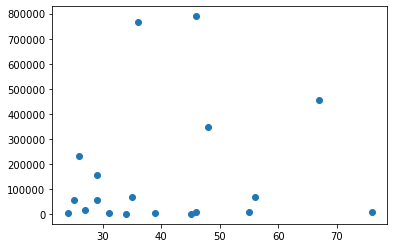

In [6]:
plt.scatter(df.age, df['Income'])

In [7]:
from sklearn.cluster import KMeans

In [8]:
KM = KMeans(n_clusters=3)

In [9]:
y_precdicted = KM.fit_predict(df[['age', 'Income']])

In [10]:
y_precdicted

array([0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0])

In [11]:
df['clusters'] = y_precdicted

In [12]:
df.head()

,Name,age,Income,clusters
0,sdgd,27,15000,0
1,shyghsd,29,156555,0
2,ghdsgh,26,232554,2
3,ghjr,29,56477,0
4,ffdgj,25,56767,0


In [13]:
KM.cluster_centers_

array([[3.93571429e+01, 3.28208571e+04],
       [4.10000000e+01, 7.77676500e+05],
       [4.70000000e+01, 3.44955000e+05]])

In [14]:
KM.cluster_centers_[:,1]

array([ 32820.85714286, 777676.5       , 344955.        ])

Text(0, 0.5, 'Income')

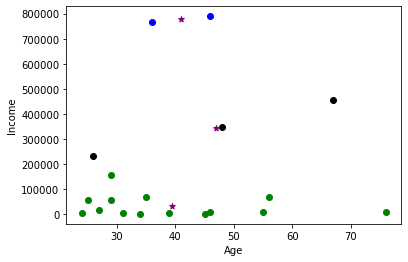

In [15]:
df1 = df[df['clusters'] == 0]
df2 = df[df['clusters'] == 1]
df3 = df[df['clusters'] == 2]

plt.scatter(df1.age, df1['Income'], color='green')
plt.scatter(df2.age, df2['Income'], color='blue')
plt.scatter(df3.age, df3['Income'], color='black')

plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:,1], marker='*', color='purple')

plt.xlabel('Age')
plt.ylabel('Income')

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [24]:
df.head()

,Name,age,Income,clusters
0,sdgd,27,0.018267,0
1,shyghsd,29,0.197682,0
2,ghdsgh,26,0.294008,2
3,ghjr,29,0.070837,0
4,ffdgj,25,0.071205,0


In [25]:
scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

In [27]:
df.head()

,Name,age,Income,clusters
0,sdgd,0.057692,0.018267,0
1,shyghsd,0.096154,0.197682,0
2,ghdsgh,0.038462,0.294008,2
3,ghjr,0.096154,0.070837,0
4,ffdgj,0.019231,0.071205,0


In [28]:
KM = KMeans(n_clusters=3)

In [29]:
y_precdicted = KM.fit_predict(df[['age', 'Income']])

In [31]:
df['clusters'] = y_precdicted

Text(0, 0.5, 'Income')

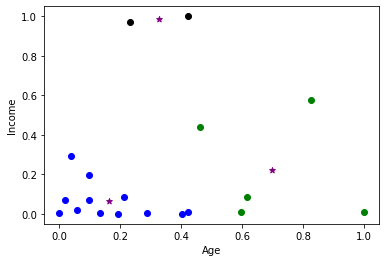

In [32]:
df1 = df[df['clusters'] == 0]
df2 = df[df['clusters'] == 1]
df3 = df[df['clusters'] == 2]

plt.scatter(df1.age, df1['Income'], color='green')
plt.scatter(df2.age, df2['Income'], color='blue')
plt.scatter(df3.age, df3['Income'], color='black')

plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:,1], marker='*', color='purple')

plt.xlabel('Age')
plt.ylabel('Income')

In [37]:
sse = []
for k in range(1,10):
    KM = KMeans(n_clusters=k)
    y_precdicted = KM.fit_predict(df[['age', 'Income']])
    sse.append(KM.inertia_)

C:\Users\manju\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'sum of squared error')

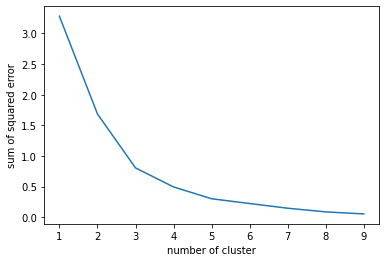

In [38]:
plt.plot(range(1,10),sse)
plt.xlabel('number of cluster')
plt.ylabel('sum of squared error')